# 1. 라이브러리

In [1]:
import numpy as np
import pandas as pd

import os
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

# '-' 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 불러오기

In [2]:
df = pd.read_csv('./data/visualization_train.csv')
df_dmg = pd.read_csv('./data/df_damage.csv')

df : 지역별 데이터를 모두 통합한 데이터

df_dmg : 피해규모 데이터

# 3-1. 2011년 ~ 2020년 연간 평균 기온

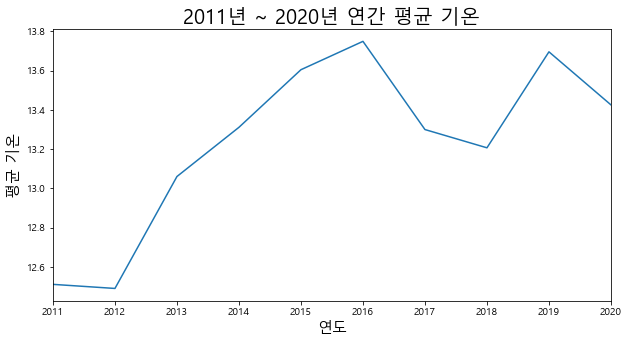

In [3]:
avg_tem = df.groupby('연도')['평균_기온'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_tem)

plt.title('2011년 ~ 2020년 연간 평균 기온', fontsize=20)

plt.xlabel('연도', fontsize=15)
plt.ylabel('평균 기온', fontsize=15)

plt.xlim(2011, 2020, 1)
plt.show()

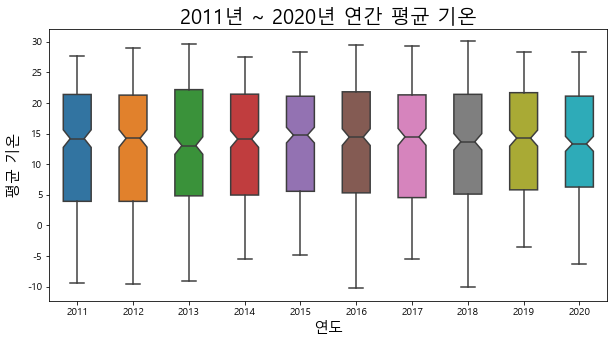

In [4]:
box_tem = pd.DataFrame(df.groupby(['연도', '월', '일'])['평균_기온'].mean()).reset_index()

plt.figure(figsize=(10, 5))
sns.boxplot(data=box_tem, x='연도', y='평균_기온', width=0.5, notch=True)

plt.title('2011년 ~ 2020년 연간 평균 기온', fontsize=20)

plt.xlabel('연도', fontsize=15)
plt.ylabel('평균 기온', fontsize=15)

plt.show()

최고 기온과 최저 기온은 각각 폭염, 한파와 연관된 지표입니다.

연간 평균 기온이 높으면 최고 기온이 높기 때문에 폭염이 발생할 가능성이 높다고 생각하기 쉽습니다.

위의 시각화 자료에서 연간 평균 기온이 높은 연도는 2016년과 2019년이고, 연간 평균 기온이 낮은 연도는 2012년과 2018년입니다.

2016년과 2019년이 2012년과 2018년보다 연간 평균 기온이 높기 때문에 폭염이 더 많이 발생했을 것이라고 생각하기 쉽습니다.

하지만 연간 평균 기온만으로는 해당년도의 최고 기온과 최저 기온, 그에 따른 폭염과 한파 발생 여부를 추론하기 어렵습니다.

예를 들어, A년도는 최고 기온이 30도, 최저 기온이 영하 20도이고 B년도는 최고 기온이 35도, 최저 기온이 영하 30도라고 가정하겠습니다.

폭염의 기준은 체감온도가 33도 이상인 경우인데, 최고 온도와 높은 상관성을 보이는 지표입니다.

연간 평균 기온은 A년도가 높지만 실제로 A년도는 B년도보다 폭염 발생 빈도가 높을 가능성이 낮습니다. 

A년도는 최고 기온이 30도이기 때문에 최고 기온이 35도인 B년도보다 체감온도가 33도 이상 올라갈 가능성이 낮기 때문입니다.

따라서 더 정확한 판단을 위해 연간 평균 기온과 함께 연간 최고, 최저 기온도 확인해보겠습니다.

# 3-2. 2011년 ~ 2020년 연간 최고/최저 기온

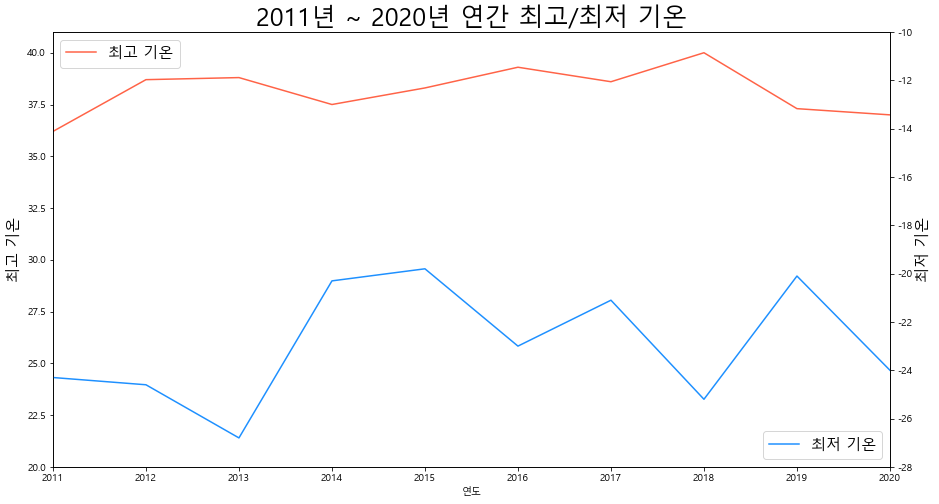

In [5]:
max_tem = df.groupby('연도')['최고_기온'].max()
min_tem = df.groupby('연도')['최저_기온'].min()

fig, ax1 = plt.subplots(figsize=(15, 8))
sns.lineplot(data=max_tem, color='tomato', legend=True, errorbar=None)

ax2 = ax1.twinx()
sns.lineplot(data=min_tem, color='dodgerblue', legend=True, errorbar=None)

plt.title('2011년 ~ 2020년 연간 최고/최저 기온', fontsize=25)

plt.xlabel('연도', fontsize=15)
ax1.set_ylabel('최고 기온', fontsize=15)
ax2.set_ylabel('최저 기온', fontsize=15)

plt.xlim(2011, 2020, 1)
ax1.set_ylim(20, 41)
ax2.set_ylim(-28, -10)

ax1.legend(['최고 기온'], loc='upper left', fontsize=15)
ax2.legend(['최저 기온'], loc='lower right', fontsize=15)
plt.show()

우선 연간 평균 기온이 높은 2016년과 2019년부터 살펴보겠습니다.

- 2016년 : 최고 기온과 최저 기온이 모두 높음 → 폭염 발생 빈도는 높고 한파 발생 빈도는 낮을 것

- 2019년 : 최고 기온은 낮은 반면에 최저 기온은 상당히 높음 → 폭염과 한파 모두 발생 빈도가 낮을 것

다음으로 연간 평균 기온이 낮은 2012년과 2018년도를 살펴보겠습니다.

- 2012년 : 최고 기온은 상당히 높은 반면에 최저 기온은 매우 낮음 → 폭염과 한파 발생 빈도가 높을 것

- 2018년 : 최고 기온은 상당히 높은 반면에 최저 기온은 매우 낮음 → 폭염과 한파 발생 빈도가 높을 것

그 중에서도 2018년이 2012년보다 최고 기온은 더 높고 최저 기온은 더 낮기 때문에 2018년이 자연재난 발생 빈도가 가장 높을 것입니다.

그렇다면 이 예측이 맞을 것인지 연도별 자연재난 발생 빈도를 시각화하여 확인해보겠습니다.

# 4-1. 연도별 자연재난 발생 빈도

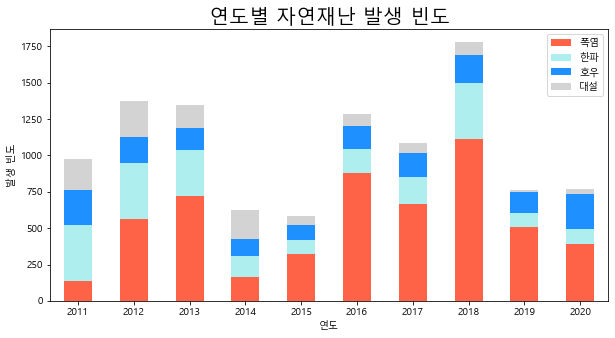

In [6]:
year_weather_sum = df.groupby(['연도'])['여름_폭염', '겨울_한파', '호우', '대설'].sum()
year_weather_sum.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax = year_weather_sum['여름_폭염'].plot(kind='bar', color='tomato')
ax = year_weather_sum['겨울_한파'].plot(kind='bar', bottom=year_weather_sum['여름_폭염'], color='paleturquoise', ax=ax)
ax = year_weather_sum['호우'].plot(kind='bar', bottom=year_weather_sum['여름_폭염']+year_weather_sum['겨울_한파'], color='dodgerblue', ax=ax)
ax = year_weather_sum['대설'].plot(kind='bar', bottom=year_weather_sum['여름_폭염']+year_weather_sum['겨울_한파']+year_weather_sum['호우'], color='lightgrey', ax=ax)

plt.title('연도별 자연재난 발생 빈도', fontsize=20)

plt.xlabel('연도')
plt.ylabel('발생 빈도')

plt.xticks(rotation=0)
ax.set_xticklabels([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

plt.legend(['폭염', '한파', '호우', '대설'], bbox_to_anchor=(1, 1))

plt.show()

앞서 간단하게 예측한 내용을 정리해보겠습니다.

- 2012년 : 폭염과 한파 발생 빈도 모두 높을 것

- 2016년 : 폭염 발생 빈도는 높고, 한파 발생 빈도는 낮을 것

- 2018년 : 폭염과 한파 발생 빈도 모두 높을 것이고, 전체 기간 중 가장 빈도가 높을 것

- 2019년 : 폭염과 한파 발생 빈도 모두 낮을 것

위의 시각화 자료를 확인해보니 최고, 최저 기온을 활용한 간단한 예측이었음에도 불구하고 모두 일치한다는 것을 알 수 있습니다.

연도별 자연재난 발생 빈도를 살펴보았으니, 다음으로 월별, 계절별 자연재난 발생 빈도를 확인해보겠습니다.

# 4-2. 월별 자연재난 발생 빈도

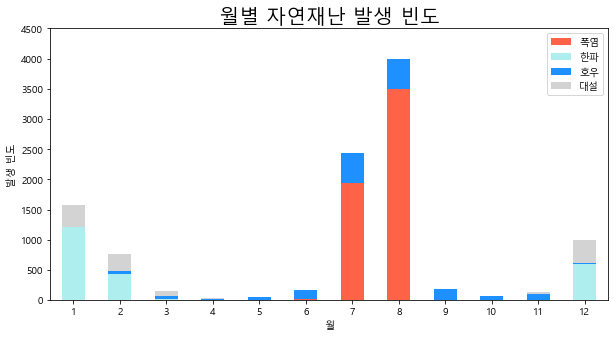

In [7]:
month = df.groupby(['월'])[['여름_폭염', '겨울_한파', '호우', '대설']].sum()
month = month.reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax = month['여름_폭염'].plot(kind='bar', color='tomato')
ax = month['겨울_한파'].plot(kind='bar', bottom=month['여름_폭염'], color='paleturquoise', ax=ax)
ax = month['호우'].plot(kind='bar', bottom=month['여름_폭염']+month['겨울_한파'], color='dodgerblue', ax=ax)
ax = month['대설'].plot(kind='bar', bottom=month['여름_폭염']+month['겨울_한파']+month['호우'], color='lightgrey', ax=ax)

plt.title('월별 자연재난 발생 빈도', fontsize=20)

plt.xlabel('월')
plt.ylabel('발생 빈도')

plt.ylim(top=4500)

plt.xticks(rotation=0)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

plt.legend(['폭염', '한파', '호우', '대설'], bbox_to_anchor=(1, 1))

plt.show()

# 4-3. 계절별 자연재난 발생 빈도

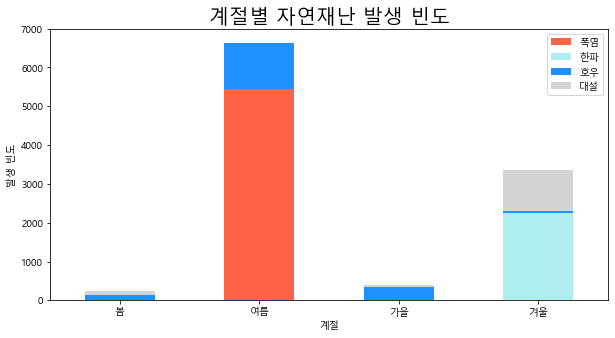

In [8]:
season = df.groupby(['계절'])[['여름_폭염', '겨울_한파', '호우', '대설']].sum()
season = pd.concat([season.iloc[2:, :], season.iloc[:2, :]])
season = season.reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax = season['여름_폭염'].plot(kind='bar', color='tomato')
ax = season['겨울_한파'].plot(kind='bar', bottom=season['여름_폭염'], color='paleturquoise', ax=ax)
ax = season['호우'].plot(kind='bar', bottom=season['여름_폭염']+season['겨울_한파'], color='dodgerblue', ax=ax)
ax = season['대설'].plot(kind='bar', bottom=season['여름_폭염']+season['겨울_한파']+season['호우'], color='lightgrey', ax=ax)

plt.title('계절별 자연재난 발생 빈도', fontsize=20)

plt.xlabel('계절')
plt.ylabel('발생 빈도')

plt.ylim(top=7000)

plt.xticks(rotation=0)
ax.set_xticklabels(['봄', '여름', '가을', '겨울'])

plt.legend(['폭염', '한파', '호우', '대설'], bbox_to_anchor=(1, 1))

plt.show()

일반적으로 3월부터 5월을 봄, 6월부터 8월을 여름, 9월부터 11월을 가을, 12월부터 2월을 겨울로 구분합니다.

위의 시각화 자료를 보면 계절을 구분하는 기준이 상당히 정확하다는 것을 알 수 있습니다.

- 봄 : 호우 발생 빈도가 높음

- 여름 : 더위에 따른 폭염과 장마로 인한 호우 발생 빈도가 높음

- 가을 : 호우 발생 빈도가 높음

- 겨울 : 추위에 따른 한파와 폭설 발생 빈도가 높음

# 5. 전국 평균 기온 분포 - 상위 5개 지역/하위 5개 지역

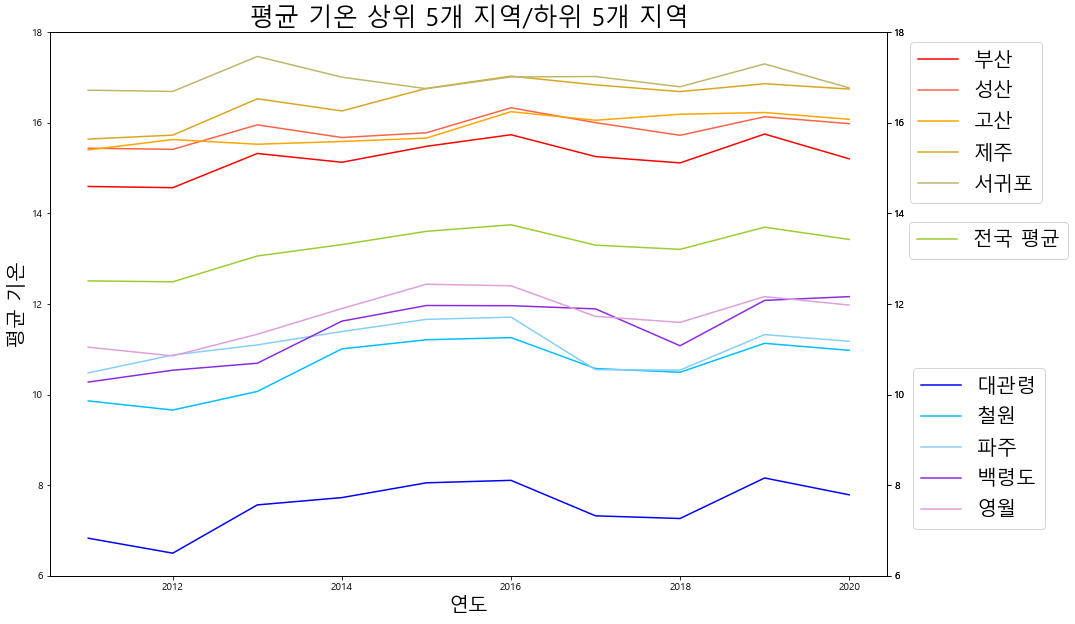

In [9]:
avg_city_tem = df.groupby(['지점명', '연도'])['평균_기온'].mean()
avg_city_tem = pd.DataFrame(avg_city_tem)
avg_city_tem = avg_city_tem.reset_index()

top = list(avg_city_tem.groupby(['지점명'])['평균_기온'].mean().sort_values()[-5:].index)
bot = list(avg_city_tem.groupby(['지점명'])['평균_기온'].mean().sort_values()[:5].index)
avg = ['전국 평균']

color_top = ['red', 'tomato', 'orange', 'goldenrod', 'darkkhaki']
color_bot = ['blue', 'deepskyblue', 'lightskyblue', 'blueviolet', 'plum']

# 시각화
# 상위 3개 지역
fig, ax1 = plt.subplots(figsize=(15, 10))

for i in range(len(top)):
    df_top3 = avg_city_tem[avg_city_tem['지점명'] == top[i]]
    sns.lineplot(df_top3, x=df_top3['연도'], y=df_top3['평균_기온'], color=color_top[i], errorbar=None, legend=True, ax=ax1)

# 하위 3개 지역
ax2 = ax1.twinx()
for i in range(len(bot)):
    df_bot3 = avg_city_tem[avg_city_tem['지점명'] == bot[i]]
    sns.lineplot(data=df_bot3, x=df_bot3['연도'], y=df_bot3['평균_기온'], color=color_bot[i], errorbar=None, legend=True, ax=ax2)

# 전국 평균
ax3 = ax1.twinx()
sns.lineplot(data=avg_tem, color='yellowgreen', legend=True, errorbar=None, ax=ax3)

# 범례, 축 설정
plt.title('평균 기온 상위 5개 지역/하위 5개 지역', fontsize=25)

ax1.set_xlabel('연도', fontsize=20)            
ax1.set_ylabel('평균 기온', fontsize=20, rotation=90)
ax2.set_ylabel('', fontsize=20, rotation=90)
ax3.set_ylabel('', fontsize=20, rotation=90)

ax1.legend(top, bbox_to_anchor=((1.015, 1.0)), fontsize=20)
ax2.legend(bot, bbox_to_anchor=((1.2, 0.4)), fontsize=20)
ax3.legend(avg, bbox_to_anchor=((1.228, 0.67)), fontsize=20)

ax1.set_ylim(6, 18)
ax2.set_ylim(6, 18)
ax3.set_ylim(6, 18)

plt.show()

위의 시각화 자료는 연평균기온이 가장 높은 지역 5개와 가장 낮은 5개 지역을 보여주고 있습니다.

- 평균 기온 상위 5개 지역 : 서귀포, 제주, 고산, 성산, 부산

- 평균 기온 하위 5개 지역 : 대관령, 철원, 파주, 백령도, 영월

이를 통해 남부 지방이 대체적으로 평균 기온이 높은 반면, 북부 지방은 평균 기온이 낮다는 것을 알 수 있습니다.

# 6-1. 2011년 ~ 2020년 자연재난 발생 비율

In [10]:
def natural_disaster(df, region):
    plt.pie(df[['여름_폭염', '겨울_한파', '호우', '대설' ]].sum().values,
            labels=df[['여름_폭염', '겨울_한파', '호우', '대설']].sum().index,
            colors=['tomato', 'paleturquoise', 'dodgerblue', 'lightgrey'],
            autopct=lambda p:'{:.2f}%'.format(p))
    plt.title(f'2011년 ~ 2020년 {region} 자연재난 발생 비율', fontsize=20)
    plt.show()

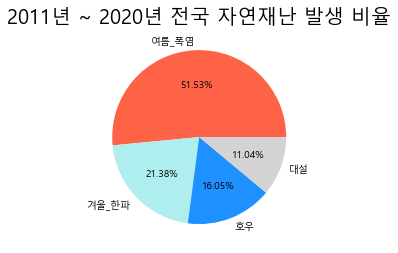

In [11]:
natural_disaster(df, '전국')

위의 시각화 자료를 보면, 지난 10년간 발생한 자연재난 중 폭염이 차지하는 비율은 다른 자연재난을 합친 것보다 크다는 것을 알 수 있습니다.

연도별 자연재난 발생 비율도 이와 비슷한 양상을 보이는지 확인해보겠습니다.

# 6-2. 연도별 자연재난 발생 비율

In [12]:
def natural_disaster_pie(df, region):
    year_list = list(range(2011, 2021))

    fig, axes = plt.subplots(5, 2, figsize=(10, 20))
    for i in range(len(year_list)):
        axes[i//2][i%2].pie(df[df['연도']==year_list[i]][['여름_폭염', '겨울_한파', '호우', '대설']].sum().values,
                            labels=df[['여름_폭염', '겨울_한파', '호우', '대설']].sum().index,
                            colors=['tomato', 'paleturquoise', 'dodgerblue', 'lightgrey'],
                            autopct=lambda p:'{:.2f}%'.format(p))
        axes[i//2][i%2].set_title(f"{year_list[i]}년 {region} 자연재난 발생 비율")
    plt.show()

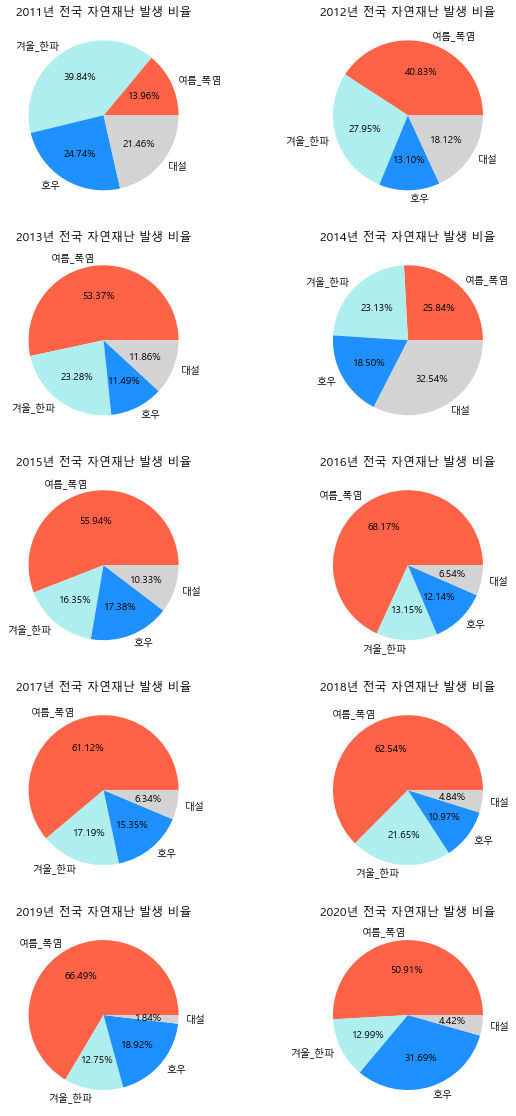

In [13]:
natural_disaster_pie(df, '전국')

대체적으로 폭염이 차지하는 비율이 가장 높고, 그 다음으로 호우가 많은 비율을 차지합니다.

- 한파 : 2011년과 2012년에 상당히 높습니다.

- 호우 : 2020년에 상당히 높습니다.

- 대설 : 2011년과 2014년에 상당히 높습니다. 그리고 시간이 지날수록 차지하는 비율이 확연하게 낮아지는 추세를 보입니다.

이처럼 특이사항이 존재하는 이유를 분석하기 위해서 지역별 자연재난 발생 빈도와 상위 3개 지역의 연도별 발생 빈도를 시각화해보겠습니다.

# 7-1. 지역별 피해규모 비율 함수

In [14]:
def dmg_pie(df, col1, col2):
    df_dmg_sum = df.groupby('지점명')[col1, col2].sum()
    df_dmg_sum.reset_index(inplace=True)

    fig, axes = plt.subplots(1, 2, figsize=(10, 20))

    axes[0].pie(df_dmg_sum[col1],
                labels=df_dmg_sum['지점명'],
                colors=['tomato', 'orange', 'khaki', 'paleturquoise', 'mediumturquoise', 'cornflowerblue', 'dodgerblue'],
                autopct=lambda p:'{:.2f}%'.format(p))
    axes[1].pie(df_dmg_sum[col2],
                labels=df_dmg_sum['지점명'],
                colors=['tomato', 'orange', 'khaki', 'paleturquoise', 'mediumturquoise', 'cornflowerblue', 'dodgerblue'],
                autopct=lambda p:'{:.2f}%'.format(p))

    axes[0].set_title(f'지역별 {col1} 비율', fontsize=20)
    axes[1].set_title(f'지역별 {col2} 비율', fontsize=20)

    plt.show()

# 7-2. 지역별 피해규모 합계 함수

In [15]:
def dmg_barplot(df, col, lim):
    df_dmg = df.groupby(['지점명', '연도'])[col].sum()
    df_dmg = df_dmg.unstack()
    df_dmg = df_dmg.reindex(['서울', '인천', '대전', '대구', '부산', '울산', '광주'])

    fig, ax = plt.subplots(figsize=(10, 5))
    ax = df_dmg[2015].plot(kind='bar', color='dodgerblue')
    ax = df_dmg[2017].plot(kind='bar', bottom=df_dmg[2015], color='cornflowerblue', ax=ax)
    ax = df_dmg[2018].plot(kind='bar', bottom=df_dmg[2015]+df_dmg[2017], color='paleturquoise', ax=ax)
    ax = df_dmg[2019].plot(kind='bar', bottom=df_dmg[2015]+df_dmg[2017]+df_dmg[2018], color='goldenrod', ax=ax)
    ax = df_dmg[2020].plot(kind='bar', bottom=df_dmg[2015]+df_dmg[2017]+df_dmg[2018]+df_dmg[2019], color='tomato', ax=ax)

    plt.title(f'지역별 {col}', fontsize=20)

    plt.xlabel('지역')
    plt.ylabel(f'{col}')

    plt.ylim(top=lim)

    plt.xticks(rotation=0)
    ax.set_xticklabels(['서울', '인천', '대전', '대구', '부산', '울산', '광주'])

    plt.legend([2015, 2017, 2018, 2019, 2020], bbox_to_anchor=(1, 1))

    plt.show()

# 7-3. 지역별 자연재난 발생 빈도 함수

In [16]:
def weather_foo(label):
    weather = df.groupby(['지점명'])[label].sum().sort_values(ascending=False)
    weather = weather.reset_index()

    weather_mean = weather[label].mean()

    # 평균 row가 위치할 index 찾기
    weather_list = []
    for i in range(len(weather)):
        if weather[label][i] >= weather_mean:
            pass
        else:
            weather_list.append(i)

    # 평균 row 추가
    weather.loc[(weather_list[0] + weather_list[0]+1)/2] = np.NaN
    weather['지점명'][(weather_list[0] + weather_list[0]+1)/2] = '전국 평균'
    weather[label][(weather_list[0] + weather_list[0]+1)/2] = weather_mean
    weather = weather.sort_values(label, ascending=False)

    # barplot 색 지정
    colors = ['tab:blue'] * 44
    for i in range(3):
        colors[i] = 'tab:red'
    colors[weather_list[0]] = 'darkgrey'

    plt.subplots(figsize=(15, 7))
    plt.bar(x=weather['지점명'], height=weather[label], color=colors)

    plt.title(f'지역별 {label} 발생 빈도', fontsize=25)

    plt.xlabel('지역', fontsize=15)
    plt.ylabel(f'{label}', fontsize=15)

    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    plt.show()

# 8-1. 지역별 피해규모 비율

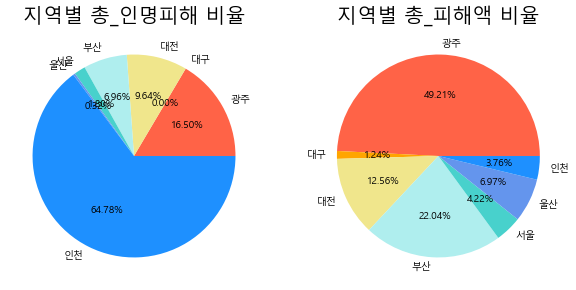

In [17]:
dmg_pie(df_dmg, '총_인명피해', '총_피해액')

피해규모 데이터는 서울과 6개의 광역시에 대한 데이터입니다.

2015년부터 2020년까지 발생한 자연재해의 인명피해와 피해액을 살펴보겠습니다.

눈에 띄는 지역이 2개 있습니다.

인천은 인명피해 비율은 64.78%로 가장 높지만 피해액 비율은 3.76%로 가장 낮은 편에 속합니다.

광주는 피해액 비율은 49.21%로 가장 높지만 인명피해 비율은 16.5%입니다.

이것으로 알 수 있는 사실은 인명피해와 피해액은 어느 한 지표가 증가한다고 해서 나머지 한 지표도 증가하는 것은 아니라는 것입니다.

# 8-2. 지역별 피해규모 합계

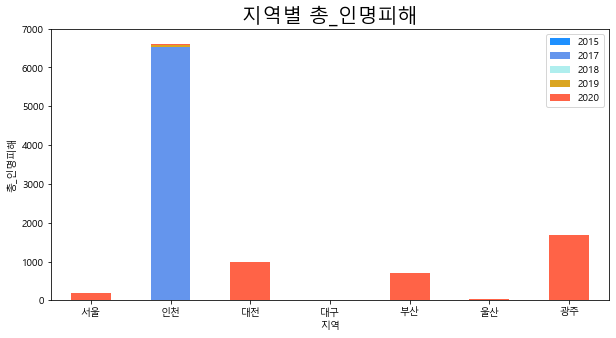

In [18]:
dmg_barplot(df_dmg, '총_인명피해', 7000)

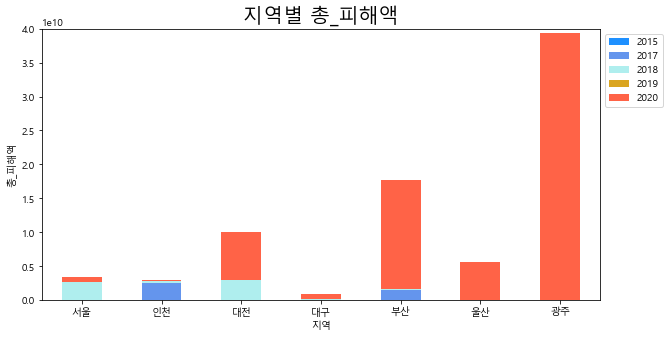

In [19]:
dmg_barplot(df_dmg, '총_피해액', 4e+10)

연도별로 살펴보겠습니다.

인명피해 비율이 가장 높은 인천은 해당 자연재난이 2017년에 발생했음을 알 수 있습니다.

피해액 비율이 가장 높은 광주는 해당 자연재난이 2020년에 발생했음을 알 수 있습니다.

추가로 2015년 인천 데이터를 제외하면 대부분의 자연재난이 2020년에 발생했다는 것도 확인할 수 있습니다.

그렇다면 2015년 인천에 큰 인명피해를 초래한 자연재난은 무엇인지, 2020년 광주에 큰 피해액을 초래한 자연재난은 무엇인지 확인해 보겠습니다.

# 8-3. 2015년 인천의 자연재난

In [20]:
def region_nd_ratio(df, region, year, cause):
    df_region = df[(df['지점명']==region) & (df['연도']==year)]
    df_region.reset_index(drop=True, inplace=True)
    df_region_sum = df_region.groupby('원인')[cause].sum()

    plt.pie(df_region_sum.values,
            labels=df_region_sum.index,
            colors=['tomato', 'dodgerblue'],
            autopct=lambda p:'{:.2f}%'.format(p))
    plt.title(f'{year}년 {region} {cause[2:]} 원인 비율', fontsize=20)
    plt.show()

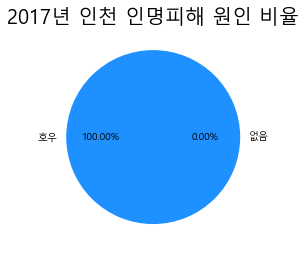

In [21]:
region_nd_ratio(df_dmg, '인천', 2017, '총_인명피해')

2017년 인천에 심각한 인명피해를 초래한 자연재난은 호우입니다.

# 8-4. 2020년 광주의 자연재난

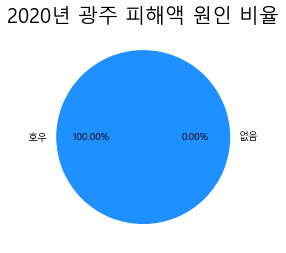

In [22]:
region_nd_ratio(df_dmg, '광주', 2020, '총_피해액')

광주 또한 인천과 마찬가지로 호우가 높은 피해액의 원인이었습니다.

# 9-1. 지역별 폭염 발생 빈도

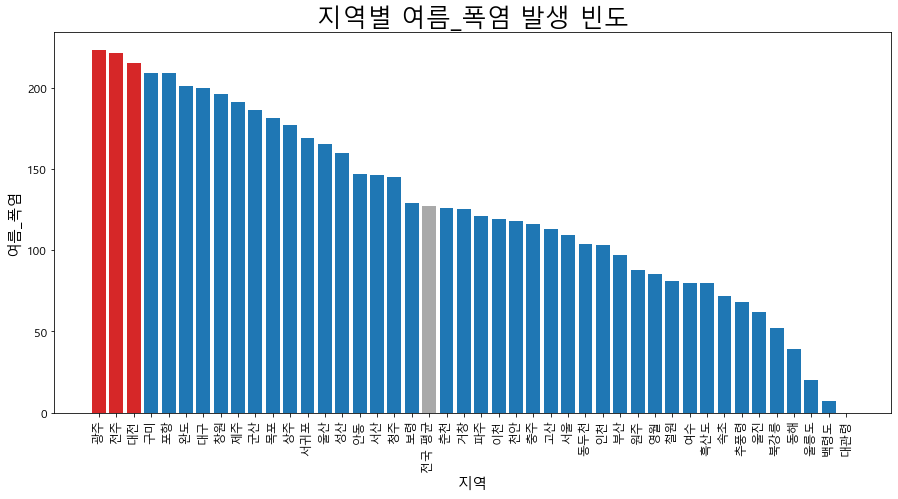

In [23]:
weather_foo('여름_폭염')

먼저 자연재난 중 가장 높은 비율을 차지하는 폭염입니다.

지역별 폭염 발생 빈도를 시각화해보니 폭염이 많이 발생하는 상위 3개 지역은 광주, 전주, 대전입니다.

그 중에서 폭염 발생 빈도 1위인 광주의 자연재난 발생 비율을 보겠습니다.

# 9-2. 광주 자연재난 발생 비율

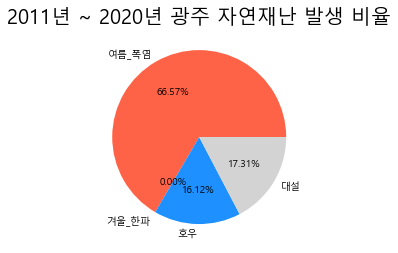

In [24]:
df_hw = df[df['지점명']=='광주']

natural_disaster(df_hw, '광주')

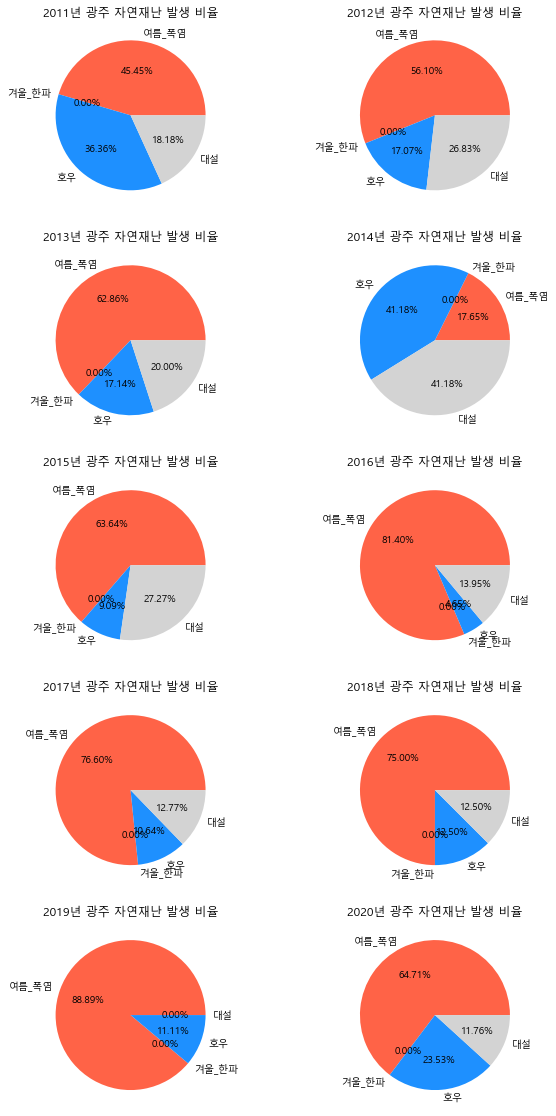

In [25]:
natural_disaster_pie(df_hw, '광주')

2011년부터 2020년까지 전국 폭염 발생 비율이 51.53%인데, 광주는 폭염이 66.57%를 차지하고 있습니다.

연도별로 살펴보면 광주는 2014년을 제외하면 폭염이 비율 대부분을 차지하고 있습니다.

특이사항은 2020년 광주의 자연재난 발생 비율입니다.

앞선 피해규모 시각화에서 2020년 광주의 높은 피해액은 호우로부터 발생했다는 것을 확인했습니다.

하지만 정작 2020년 광주의 자연재난 발생 비율은 폭염이 호우에 비해 약 3배 높다는 것입니다.

이것으로 알 수 있는 사실은 자연재난 발생 빈도가 높다고 해서 그에 따른 피해규모도 비례하여 증가하는 것은 아니라는 것입니다.

# 9-3. 폭염 상관관계

In [26]:
heatwave_city = df.groupby(['지점명'])['여름_폭염'].sum().sort_values(ascending=False)[:3].index
heatwave_city

Index(['광주', '전주', '대전'], dtype='object', name='지점명')

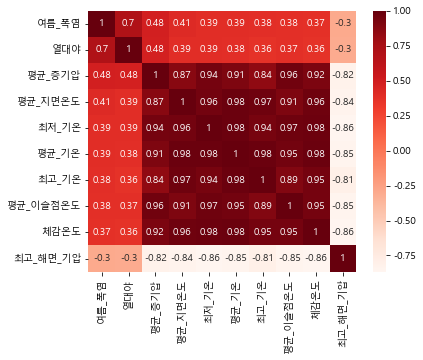

In [27]:
heatwave_gwangju = df[df['지점명'] == '광주']
heatwave_gwangju_corr = abs(heatwave_gwangju.corr()['여름_폭염']).sort_values(ascending=False)
heatwave_gwangju_col = heatwave_gwangju_corr[heatwave_gwangju_corr >= 0.3].index

plt.figure(figsize=(6, 4.8))
sns.heatmap(heatwave_gwangju[heatwave_gwangju_col].corr(), annot=True, cmap='Reds')
plt.show()

폭염과 상관관계가 높은 지표를 살펴보았습니다.

열대야와 평균 증기압의 상관계수는 각각 0.7, 0.48로 높은 상관관계를 보입니다.

평균 기온, 최고 기온, 최저 기온, 평균 이슬점온도, 체감온도의 상관계수는 0.37 ~ 0.39로 서로 비슷한 수준입니다.

위의 지표들을 활용하여 폭염과 지표들 사이의 상관관계를 시각화해보겠습니다.

# 9-4. 폭염 상관관계 시각화

In [28]:
def heatwave_pairplot(city):
    heatwave_city = df[df['지점명'] == city]
    heatwave_col = ['여름_폭염', '열대야', '평균_증기압', '체감온도', '평균_이슬점온도']
    sns.pairplot(data=heatwave_city[heatwave_col], hue='여름_폭염')
    plt.show()

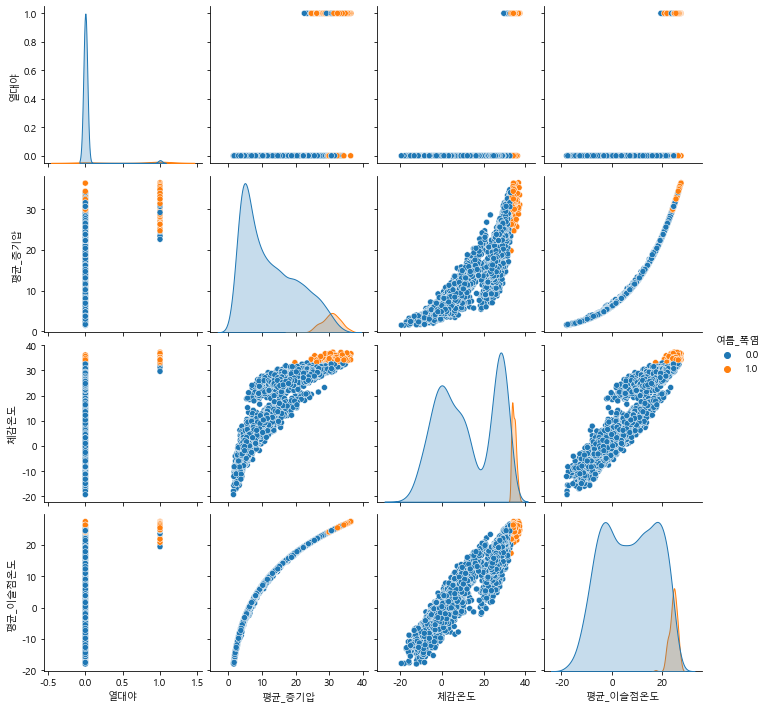

In [29]:
heatwave_pairplot('광주')

이어서 지표들의 분포를 히스토그램으로 시각화해보겠습니다.

# 9-5. 폭염 히스토그램

In [30]:
def heatwave_hist(city):
    heatwave_city = df[df['지점명'] == city]
    heatwave_col = ['여름_폭염', '열대야', '평균_증기압', '체감온도', '평균_이슬점온도']

    fig, ax = plt.subplots(2, 2, figsize=(10, 7))
    sns.histplot(data=heatwave_city[heatwave_col],  x='열대야', hue='여름_폭염', ax=ax[0][0])

    sns.histplot(data=heatwave_city[heatwave_col],  x='평균_증기압', kde=True, hue='여름_폭염', ax=ax[0][1])
    sns.histplot(data=heatwave_city[heatwave_col],  x='체감온도', kde=True, hue='여름_폭염', ax=ax[1][0])
    sns.histplot(data=heatwave_city[heatwave_col],  x='평균_이슬점온도', kde=True, hue='여름_폭염', ax=ax[1][1])

    ax[0][0].set_ylim(bottom=0, top=400)

    plt.show()

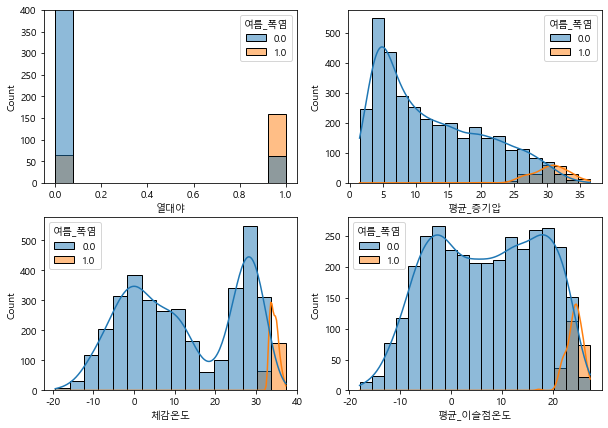

In [31]:
heatwave_hist('광주')

이 그래프에서 두 가지를 살펴보겠습니다.

첫 번째로 평시 데이터(폭염 라벨링 0)가 폭염 데이터(폭염 라벨링 1)보다 압도적으로 많다는 것입니다.

이는 데이터 불균형을 의미하는데, 향후 학습 모델을 활용하여 예측을 할 때 걸림돌이 될 수 있는 문제입니다.

모델을 설계할 때 데이터 불균형을 어떤 방식으로 해결할 것인지 생각해야 할 것입니다.

두 번째로 위 4개의 지표들은 상관계수가 유의미한 지표들 중 상위 4개를 시각화한 것입니다.

열대야, 평균 증기압, 체감온도, 이슬점 온도 모두 수치가 특정 기준 이상을 달성하면 폭염이 발생하는 것을 볼 수 있습니다.

# 10-1. 지역별 한파 발생 빈도

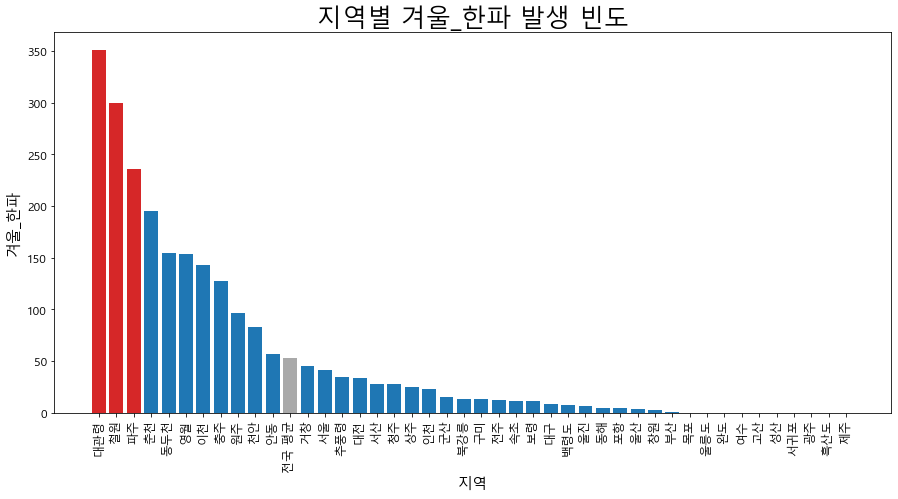

In [32]:
weather_foo('겨울_한파')

두 번째로 한파입니다.

지역별 한파 발생 빈도를 시각화해보니 한파가 많이 발생하는 상위 3개 지역은 대관령, 철원, 파주입니다.

그 중에서 한파 발생 빈도 1위인 대관령의 자연재난 발생 비율을 보겠습니다.

# 10-2. 대관령 자연재난 발생 비율

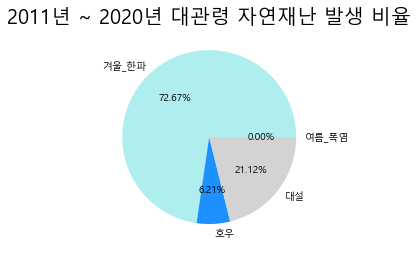

In [33]:
df_cw = df[df['지점명']=='대관령']

natural_disaster(df_cw, '대관령')

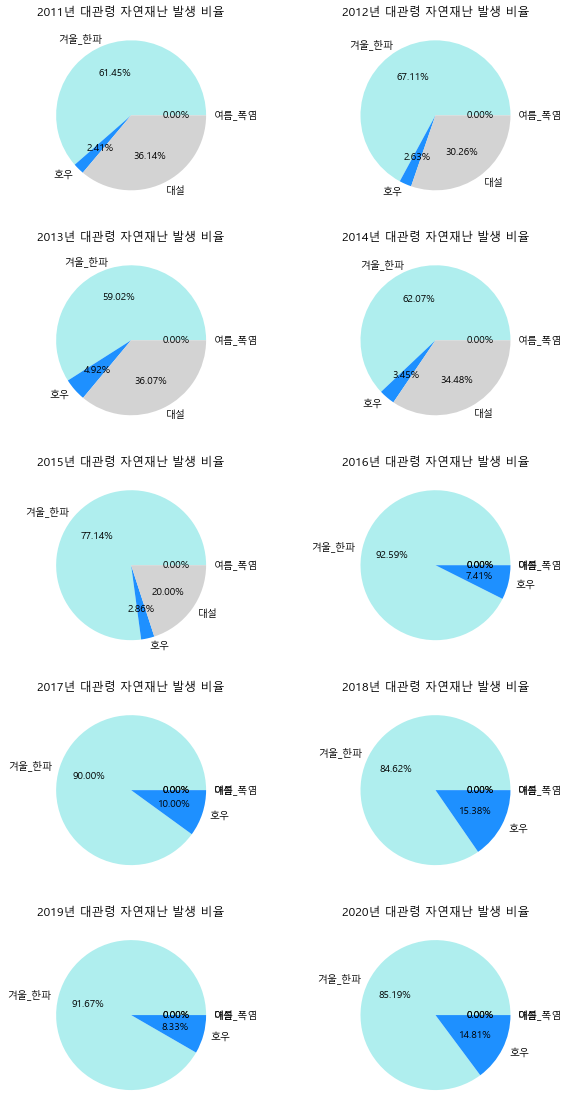

In [34]:
natural_disaster_pie(df_cw, '대관령')

대관령은 2011년부터 2020년까지 발생한 자연재난 중 한파가 72.67%를 차지하고 있습니다.

2011년부터 2020년까지 전국 한파 발생 비율이 21.38%인 것을 감안하면 상당한 비율입니다.

# 10-3. 한파 상관관계

In [35]:
coldsave_city = df.groupby(['지점명'])['겨울_한파'].sum().sort_values(ascending=False)[:3].index
coldsave_city

Index(['대관령', '철원', '파주'], dtype='object', name='지점명')

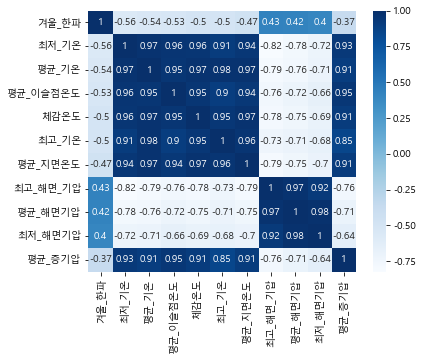

In [36]:
coldwave_daegwallyeong = df[df['지점명'] == '대관령']
coldwave_corr = abs(coldwave_daegwallyeong.corr()['겨울_한파']).sort_values(ascending=False)
coldwave_col = coldwave_corr[coldwave_corr >= 0.3].index

plt.figure(figsize=(6, 4.8))
sns.heatmap(coldwave_daegwallyeong[coldwave_col].corr(), annot=True, cmap='Blues')
plt.show()

한파와 상관관계가 높은 지표를 살펴보았습니다.

평균 기온, 최고 기온, 최저 기온, 평균 이슬점온도, 체감온도의 상관계수는 0.5 ~ 0.56으로 서로 비슷한 수준입니다.

위의 지표들을 활용하여 한파와 지표들 사이의 상관관계를 시각화해보겠습니다.

# 10-4. 한파 상관관계 시각화

In [37]:
def coldwave_pairplot(city):
    coldwave_city = df[df['지점명'] == city]
    coldwave_col = ['겨울_한파', '평균_기온', '평균_이슬점온도', '체감온도', '평균_해면기압']
    sns.pairplot(data=coldwave_city[coldwave_col], hue='겨울_한파')
    plt.show()

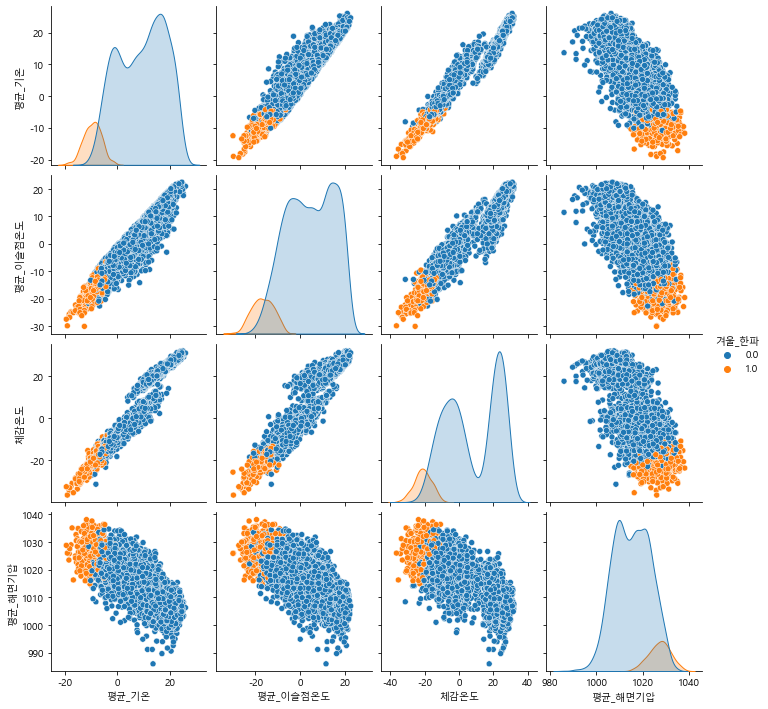

In [38]:
coldwave_pairplot('대관령')

이어서 지표들의 분포를 히스토그램으로 시각화해보겠습니다.

# 10-5. 한파 히스토그램

In [39]:
def coldwave_hist(city):
    coldwave_city = df[df['지점명'] == city]
    coldwave_col = ['겨울_한파', '평균_기온', '평균_이슬점온도', '체감온도', '평균_해면기압']
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))

    sns.histplot(data=coldwave_city[coldwave_col], x='평균_기온', hue='겨울_한파', ax=ax[0][0])
    sns.histplot(data=coldwave_city[coldwave_col], x='평균_이슬점온도', kde=True, hue='겨울_한파', ax=ax[0][1])
    sns.histplot(data=coldwave_city[coldwave_col], x='체감온도', kde=True, hue='겨울_한파', ax=ax[1][0])
    sns.histplot(data=coldwave_city[coldwave_col], x='평균_해면기압', kde=True, hue='겨울_한파', ax=ax[1][1])

    plt.show()

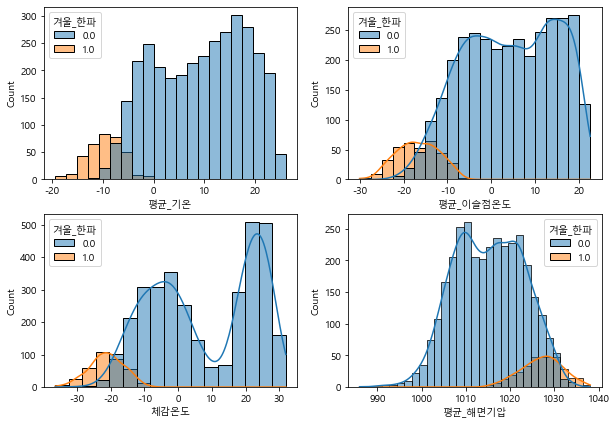

In [40]:
coldwave_hist('대관령')
# coldwave_hist('철원')
# coldwave_hist('파주')

- 데이터 불균형

- 각 지표가 특정 기준 이상 또는 이하를 달성했을 때 한파 발생

폭염 상관계수 시각화와 마찬가지로 위와 같은 사실을 확인할 수 있습니다.

# 11-1. 지역별 호우 발생 빈도

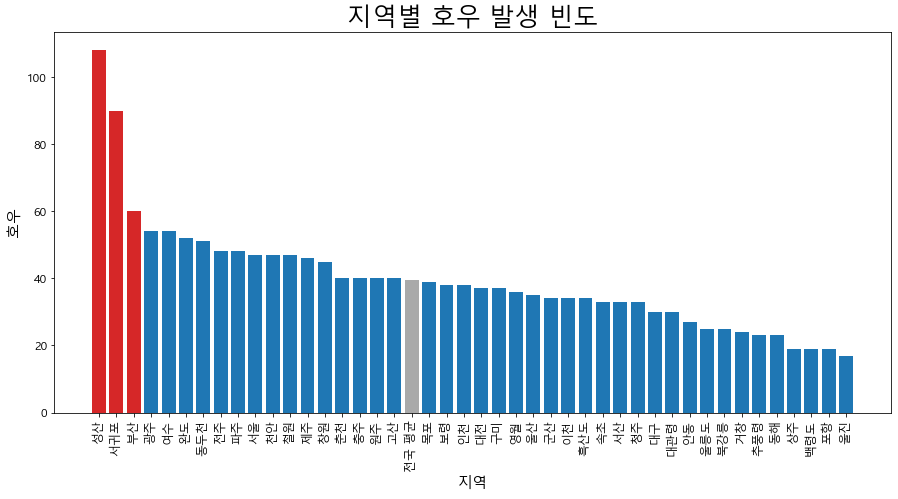

In [41]:
weather_foo('호우')

세 번째로 호우입니다.

지역별 호우 발생 빈도를 시각화해보니 호우가 많이 발생하는 상위 3개 지역은 성산, 서귀포, 부산입니다.

그 중에서 호우 발생 빈도 1위인 성산의 자연재난 발생 비율을 보겠습니다.

# 11-2. 성산 자연재난 발생 비율

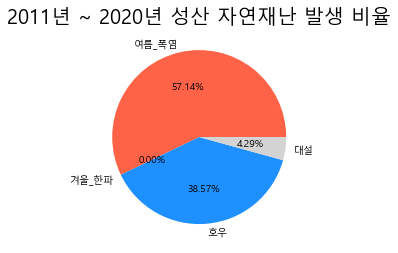

In [42]:
df_rain = df[df['지점명']=='성산']
natural_disaster(df_rain, '성산')

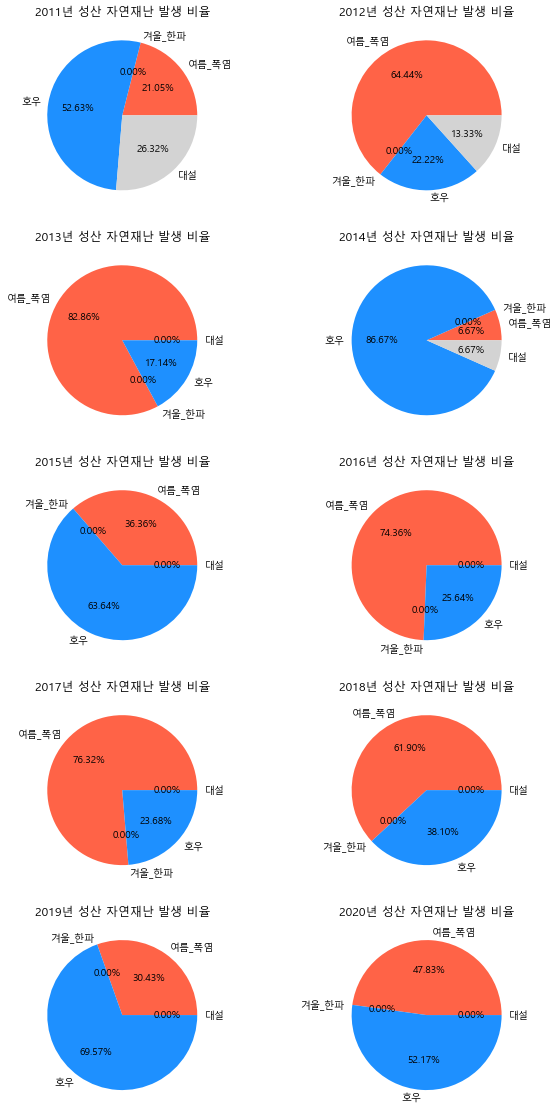

In [43]:
natural_disaster_pie(df_rain, '성산')

성산은 2011년부터 2020년까지 발생한 자연재난 중 호우가 38.57%를 차지하고 있습니다.

2011년부터 2020년까지 전국 호우 발생 비율이 16.05%인 것을 감안하면 상당한 비율입니다.

# 11-3. 호우 상관관계

In [44]:
rain_city = df.groupby(['지점명'])['호우'].sum().sort_values(ascending=False)[:3].index
rain_city

Index(['성산', '서귀포', '부산'], dtype='object', name='지점명')

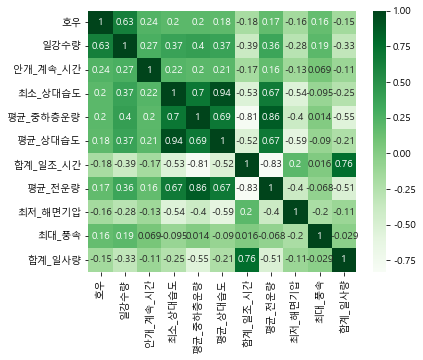

In [45]:
rain_busan = df[df['지점명'] == '부산']
rain_corr = abs(rain_busan.corr()['호우']).sort_values(ascending=False)
rain_col = rain_corr[rain_corr >= 0.15].index

plt.figure(figsize=(6, 4.8))
sns.heatmap(rain_busan[rain_col].corr(), annot=True, cmap='Greens')
plt.show()

호우와 상관관계가 높은 지표를 살펴보았습니다.

일강수량의 상관계수는 0.63으로 매우 높습니다.

안계 계속 시간, 최소 상대습도, 평균 중하층운량의 상관계수는 0.2 ~ 0.24로 서로 비슷한 수준입니다.

위의 지표들을 활용하여 호우와 지표들 사이의 상관관계를 시각화해보겠습니다.

# 11-4. 호우 상관관계 시각화

In [46]:
def up_10(num):
    temp = ''
    num = int(num)
    num = str(num)
    if num != '0':
        if len(num) == 3:
            if int(num[-2])+1 != 10:
                temp = int(num[-3] + str(int(num[-2])+1) + '0')
            else:
                temp = int(str(int(num[-3]) + 1) + '0' + '0')
        elif len(num) == 2:
            if int(num[-2])+1 != 10:
                temp = int(str(int(num[-2])+1) + '0')
            else:
                temp = 100
        elif int(num) >= 5 :
            temp = 10
        elif int(num) >= 3:
            temp = 5
        else:
            temp = 0
    else:
        temp = int(num)
    return temp

In [47]:
def rain_pairplot(city):
    df['일강수량'] = df['일강수량'].apply(lambda x: up_10(x))
    rain_city = df[df['지점명'] == city]
    rain_col = ['호우', '일강수량', '안개_계속_시간', '평균_중하층운량', '최소_상대습도']
    sns.pairplot(data=rain_city[rain_col], hue='호우')
    plt.show()

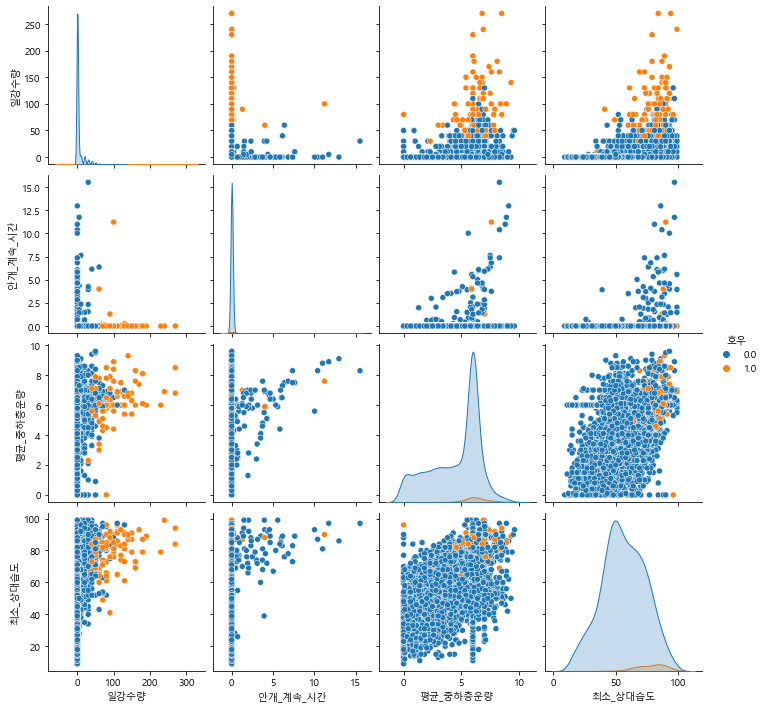

In [48]:
rain_pairplot('성산')

이어서 지표들의 분포를 히스토그램으로 시각화해보겠습니다.

# 11-5. 호우 히스토그램

In [49]:
def rain_hist(city):
    df['일강수량'] = df['일강수량'].apply(lambda x: up_10(x))
    rain_city = df[df['지점명'] == city]
    rain_col = ['호우', '일강수량', '안개_계속_시간', '평균_중하층운량', '최소_상대습도']
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))

    sns.histplot(data=rain_city[rain_col], x='일강수량', hue='호우', kde=True, ax=ax[0][0])
    sns.histplot(data=rain_city[rain_col], x='안개_계속_시간', kde=True, hue='호우', ax=ax[0][1])
    sns.histplot(data=rain_city[rain_col], x='평균_중하층운량', kde=True, hue='호우', ax=ax[1][0])
    sns.histplot(data=rain_city[rain_col], x='최소_상대습도', kde=True, hue='호우', ax=ax[1][1])

    ax[0][0].set_ylim(bottom=0, top=100)
    ax[0][0].set_xlim(left=0, right=300)
    ax[0][1].set_ylim(bottom=0, top=500)

    plt.show()

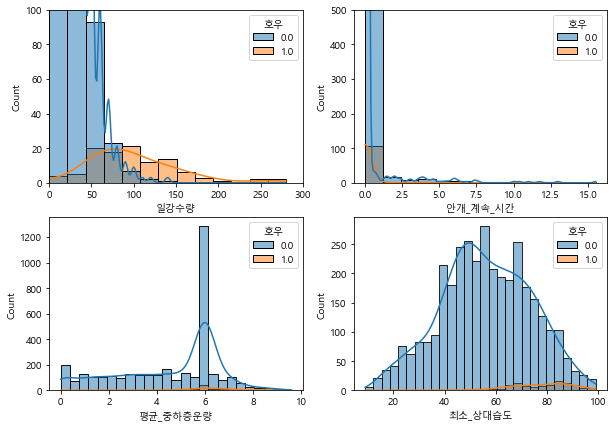

In [50]:
rain_hist('성산')

폭염, 한파에 비해 비교적 넓게 분포해있습니다.

# 12-1. 지역별 대설 발생 빈도

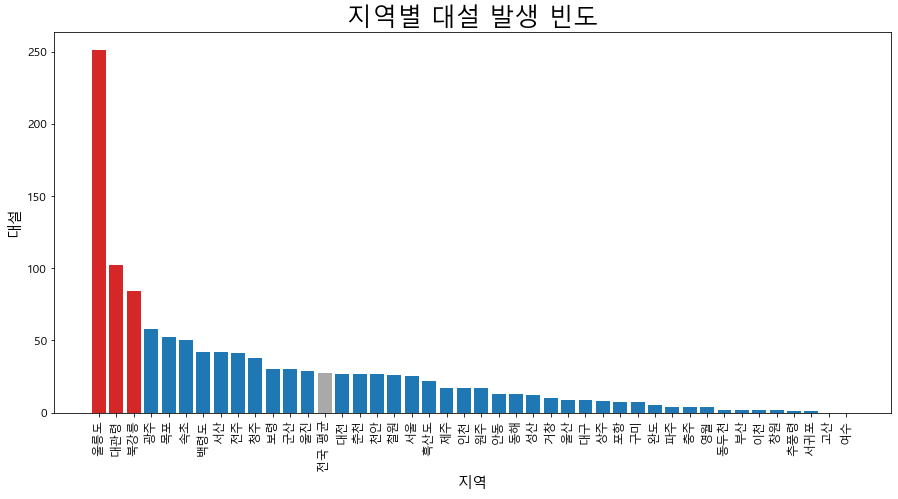

In [51]:
weather_foo('대설')

네 번째로 대설입니다.

지역별 대설 발생 빈도를 시각화해보니 대설이 많이 발생하는 상위 3개 지역은 울릉도, 대관령, 북강릉입니다.

그 중에서 대설 발생 빈도 1위인 울릉도의 자연재난 발생 비율을 보겠습니다.

# 12-2. 울릉도 자연재난 발생 비율

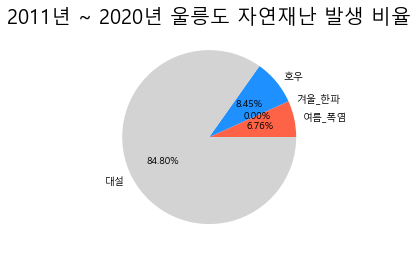

In [52]:
df_snow = df[df['지점명']=='울릉도']
natural_disaster(df_snow, '울릉도')

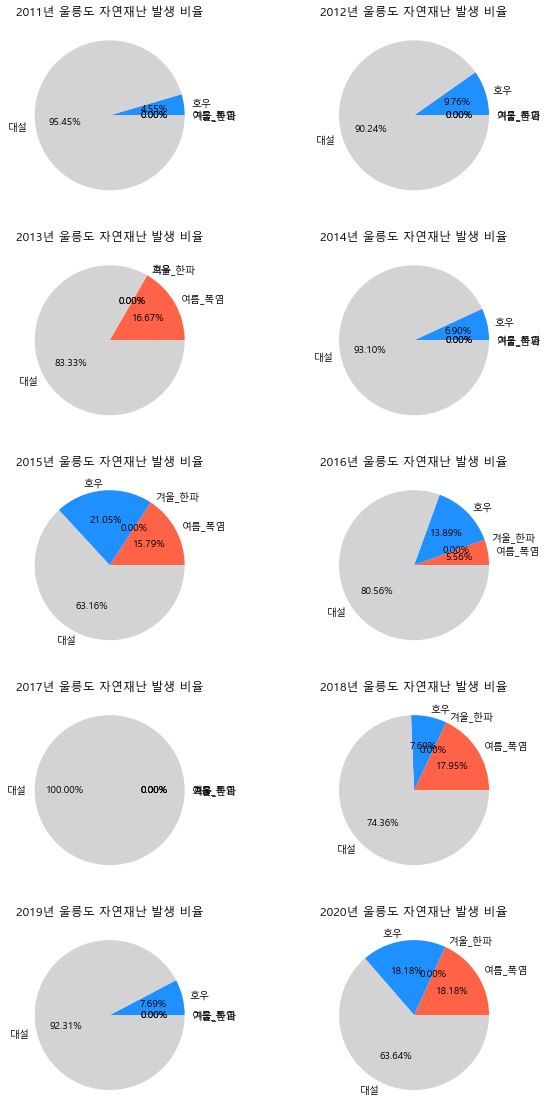

In [53]:
natural_disaster_pie(df_snow, '울릉도')

울릉도는 2011년부터 2020년까지 발생한 자연재난 중 대설이 84.80%를 차지하고 있습니다.

2011년부터 2020년까지 전국 대설 발생 비율이 11.04%인 것을 감안하면 상당한 비율입니다.

# 12-3. 대설 상관관계

In [54]:
snow_city = df.groupby(['지점명'])['대설'].sum().sort_values(ascending=False)[:3].index
snow_city

Index(['울릉도', '대관령', '북강릉'], dtype='object', name='지점명')

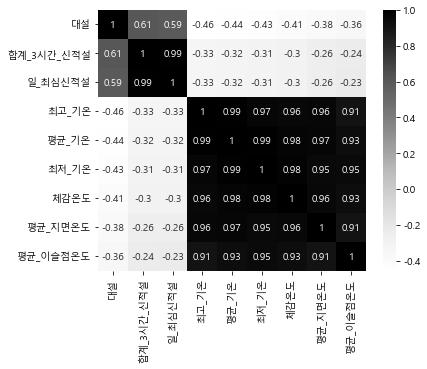

In [55]:
snow_ulleungdo = df[df['지점명'] == '울릉도']
snow_corr = abs(snow_ulleungdo.corr()['대설']).sort_values(ascending=False)
snow_col = snow_corr[snow_corr >= 0.3].index

plt.figure(figsize=(6, 4.8))
sns.heatmap(snow_ulleungdo[snow_col].corr(), annot=True, cmap='Greys')
plt.show()

대설과 상관관계가 높은 지표를 살펴보았습니다.

합계 3시간 신적설, 일 최심신적설의 상관계수는 각각 0.61, 0.59로 높은 상관관계를 보입니다.

평균 기온, 최고 기온, 최저 기온, 체감온도의 상관계수는 0.41 ~ 0.46으로 서로 비슷한 수준입니다.

위의 지표들을 활용하여 대설과 지표들 사이의 상관관계를 시각화해보겠습니다.

# 12-4. 대설 상관관계 시각화

In [56]:
def snow_pairplot(city):
    snow_city = df[df['지점명'] == city]
    snow_col = ['대설', '합계_3시간_신적설', '최고_기온', '평균_지면온도', '평균_이슬점온도']
    sns.pairplot(data=snow_city[snow_col], hue='대설')
    plt.show()

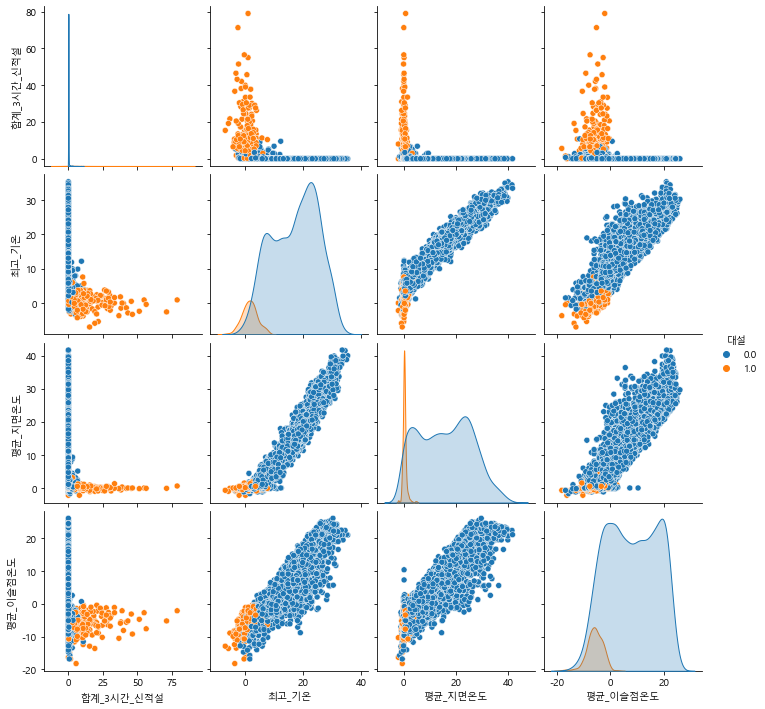

In [57]:
snow_pairplot('울릉도')

이어서 지표들의 분포를 히스토그램으로 시각화해보겠습니다.

# 12-5. 대설 히스토그램

In [58]:
def snow_hist(city):
    snow_city = df[df['지점명'] == city]
    snow_col = ['대설', '합계_3시간_신적설', '최고_기온', '평균_지면온도', '평균_이슬점온도']
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))

    sns.histplot(data=snow_city[snow_col], x='합계_3시간_신적설', kde=True, hue='대설', ax=ax[0][0])
    sns.histplot(data=snow_city[snow_col], x='최고_기온', kde=True, hue='대설', ax=ax[0][1])
    sns.histplot(data=snow_city[snow_col], x='평균_지면온도', kde=True, hue='대설', ax=ax[1][0])
    sns.histplot(data=snow_city[snow_col], x='평균_이슬점온도', kde=True, hue='대설', ax=ax[1][1])

    ax[0][0].set_ylim(bottom=0, top=2000)
    ax[0][0].set_xlim(left=0, right=40)

    plt.show()

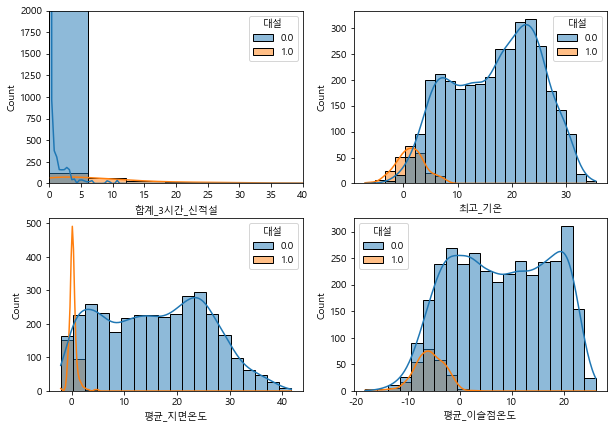

In [59]:
snow_hist('울릉도')